# Uniform Search Space distribution

A current problem we may encounter is that by looking at the user space as an evenly shaped hypercube, we have an uneven distribution when transforming this into the CLIP-Embedding-Space as clip embeddings are only on a hypersphere. Let's first visualize the current process to demonstrate the weakness in a two dimensional reducion.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

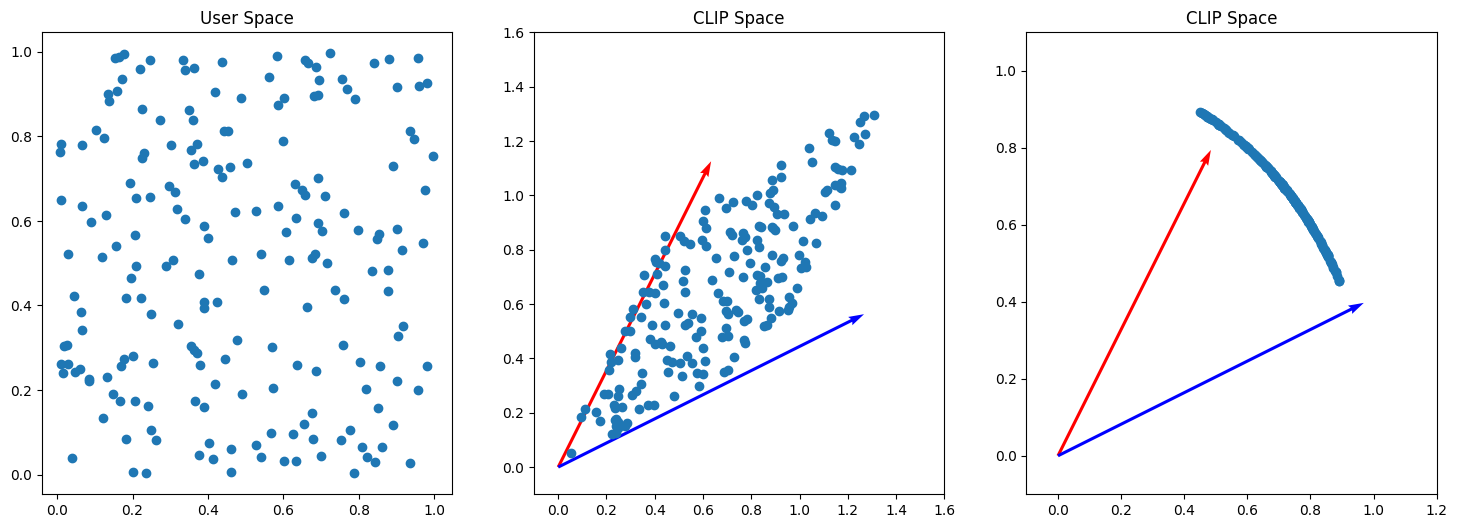

In [18]:
torch.manual_seed(42)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Define two Vectors defining the User Space in the CLIP space
origin = torch.tensor([[0, 0], [0, 0]]) # origin point
heads = torch.tensor([[1., 2.], [2., 1.]])
heads_normed = F.normalize(heads, p=2, dim=-1)

# Generate random samples in the user space
x_rand = torch.rand(size=(200, 2)).uniform_()
plt.axes(ax[0])
plt.scatter(x_rand[:,0], x_rand[:,1])
plt.title('User Space')

# Plot random samples transformed into the user space
embeds =  x_rand @ heads_normed
plt.axes(ax[1])
plt.quiver(*origin, heads_normed[:,0], heads_normed[:,1], color=['r','b'], scale=1.2)
plt.scatter(embeds[:,0], embeds[:,1])
plt.xlim(-0.1, 1.6)
plt.ylim(-0.1, 1.6)
plt.title('CLIP Space')

# Project embeds on the spheres surface
embeds_proj = F.normalize(embeds, p=2, dim=-1)
plt.axes(ax[2])
plt.quiver(*origin, heads_normed[:,0], heads_normed[:,1], color=['r','b'], scale=1.2)
plt.scatter(embeds_proj[:,0], embeds_proj[:,1])
plt.xlim(-0.1, 1.2)
plt.ylim(-0.1, 1.1)
plt.title('CLIP Space')

plt.show()

In [ ]:
torch.norm(heads, p=1, dim=-1)